In [1]:
%cd ..

/Users/crupley/gal/hoodie-development


In [247]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import json

from sklearn.metrics import pairwise_distances

from code.clusterize import *

In [3]:
fdf = load_featuredf()
fdf.head()

,lat,lon,taxable_value,grocery,restaurant,retail,ncrimes,sgnf,avg_hh_size,population,walkscore
0,37.750067,-122.441075,0.288994,-0.640949,-0.561362,-0.582297,-0.509058,0.477959,-0.017894,-0.102338,-0.025533
1,37.750196,-122.438933,0.336486,-0.576766,-0.465886,-0.515304,-0.509038,1.060608,0.253293,0.043369,0.146457
2,37.756794,-122.436270,0.350392,-0.131126,-0.396314,-0.227381,-0.313369,0.276664,0.244508,0.413731,0.701471
3,37.753529,-122.437050,0.327277,-0.298948,-0.286766,-0.356888,-0.456736,0.945703,0.372523,0.260021,0.594762
4,37.755758,-122.433400,0.355234,0.018376,-0.470065,-0.123353,-0.345027,0.674973,0.360681,0.530529,0.622791


In [4]:
cnum = cut2cluster('010405', 28, allowed_nodes = fdf.index)

In [52]:
nodelist = set(fdf.index).intersection(set(cnum.index))
fdf = fdf.ix[nodelist]
cnum = cnum.ix[nodelist]

In [53]:
# nodelist = set(fdf.index).intersection(set(cnum.index))
# fdf = fdf.ix[nodelist]
# cnum = cnum.ix[nodelist]
print cnum.shape
print fdf.shape

(7299,)
(7299, 13)


In [6]:
len(cnum.unique())

25

In [7]:
cnum.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [8]:
sim = most_similar(fdf, cnum)
sim

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0
0,0.000000,1.214437,1.631896,2.695179,3.083136,1.017432,1.083235,3.826779,2.213604,1.927196,...,2.011608,2.206302,1.169621,0.836410,1.649377,1.858470,2.009443,1.966903,1.694904,5.801696
1,1.214437,0.000000,2.597346,3.071957,3.635174,2.139089,0.799384,3.078860,3.005131,2.810849,...,1.546873,1.577866,2.054152,1.681885,2.763459,2.917214,3.042421,2.944605,2.590869,5.973425
2,1.631896,2.597346,0.000000,1.964277,1.961732,0.972042,2.546027,4.958650,1.054066,0.669590,...,3.522418,3.014093,0.884924,1.183978,1.096943,0.541038,0.659570,1.038094,0.749232,4.989331
3,2.695179,3.071957,1.964277,0.000000,1.439485,2.423889,3.396529,4.505708,2.033703,2.337429,...,4.025570,2.523791,2.297226,2.443741,3.019711,2.242160,2.049974,2.866982,2.386380,4.481675
4,3.083136,3.635174,1.961732,1.439485,0.000000,2.535222,3.873943,5.069979,1.503584,2.054578,...,4.521829,3.266221,2.503764,2.804019,2.949659,2.139073,1.923069,2.561456,2.318462,3.928311
5,1.017432,2.139089,0.972042,2.423889,2.535222,0.000000,2.051930,4.466682,1.455406,1.389189,...,2.812102,2.763752,1.104456,1.098570,1.079476,1.147977,1.123197,1.236029,1.322346,5.655676
6,1.083235,0.799384,2.546027,3.396529,3.873943,2.051930,0.000000,3.630818,3.093910,2.697986,...,1.605893,2.257478,1.867075,1.496852,2.449709,2.791920,3.018999,2.810259,2.384409,6.166926
7,3.826779,3.078860,4.958650,4.505708,5.069979,4.466682,3.630818,0.000000,5.110045,5.255730,...,2.752207,2.318967,4.618813,4.414256,5.372967,5.208192,5.179458,5.417477,5.167234,6.792042
8,2.213604,3.005131,1.054066,2.033703,1.503584,1.455406,3.093910,5.110045,0.000000,1.146353,...,3.875464,3.232668,1.739918,1.938721,1.746668,1.342826,1.046269,1.244848,1.444216,4.942301
9,1.927196,2.810849,0.669590,2.337429,2.054578,1.389189,2.697986,5.255730,1.146353,0.000000,...,3.734866,3.350119,0.984361,1.354906,1.146182,0.792580,1.140154,0.982669,0.575774,4.690479


In [18]:
sim.max().max()

6.7920420523557521

In [30]:
n = np.linspace(0,10)
# c = [c, c]

In [59]:
cm = matplotlib.cm.get_cmap('RdYlGn')
c = cm(np.linspace(0,1,len(n)))
clist = [matplotlib.colors.rgb2hex(rgb) for rgb in c]


In [67]:
mygrad = np.array([np.linspace(1,0), np.linspace(0,1), np.zeros(50), np.ones(50)]).T

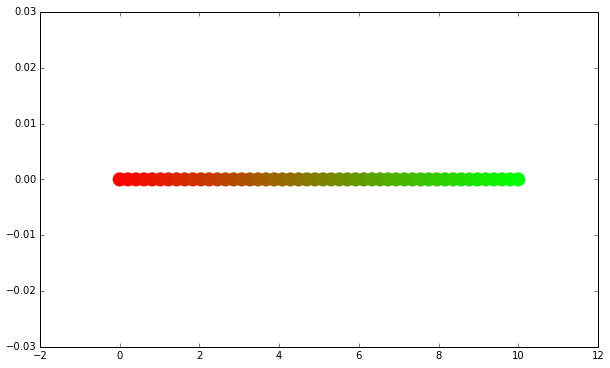

In [68]:
plt.figure(figsize=(10,6))
plt.scatter(n,np.zeros(50), c=mygrad, linewidth=0, s=200)

In [143]:
neibc = sim.iloc[:,0].apply(lambda x: [x/10., 1-x/10., 0, 1])
print neibc.shape
neibc

(25,)


0                            [0.0, 1.0, 0, 1]
1      [0.121443710337, 0.878556289663, 0, 1]
2      [0.163189562121, 0.836810437879, 0, 1]
3        [0.26951788958, 0.73048211042, 0, 1]
4      [0.308313644972, 0.691686355028, 0, 1]
5      [0.101743155628, 0.898256844372, 0, 1]
6        [0.10832346452, 0.89167653548, 0, 1]
7      [0.382677906985, 0.617322093015, 0, 1]
8      [0.221360415679, 0.778639584321, 0, 1]
9      [0.192719575428, 0.807280424572, 0, 1]
10     [0.544781690106, 0.455218309894, 0, 1]
11     [0.209161723786, 0.790838276214, 0, 1]
12     [0.201474215232, 0.798525784768, 0, 1]
13     [0.231372881421, 0.768627118579, 0, 1]
14     [0.171919767326, 0.828080232674, 0, 1]
15     [0.201160771251, 0.798839228749, 0, 1]
16       [0.22063023902, 0.77936976098, 0, 1]
17     [0.116962094968, 0.883037905032, 0, 1]
18    [0.0836409562969, 0.916359043703, 0, 1]
19     [0.164937673288, 0.835062326712, 0, 1]
20     [0.185847006092, 0.814152993908, 0, 1]
21     [0.200944342325, 0.79905565

In [144]:
pltc = cnum.replace(sim.loc[:,0]).apply(lambda x: matplotlib.colors.rgb2hex([x/10., 1-x/10., 0, 1]))

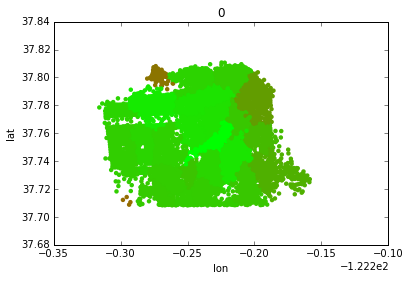

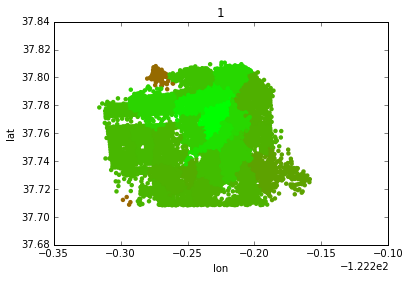

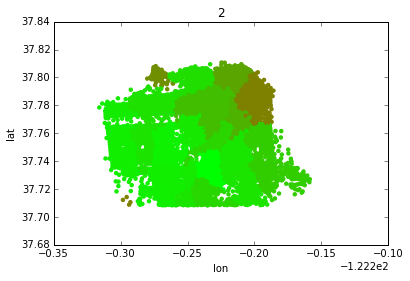

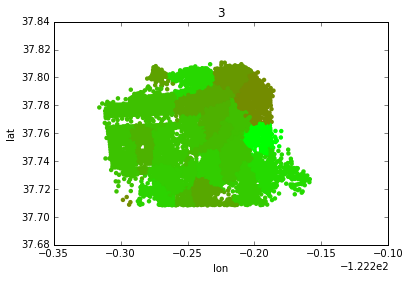

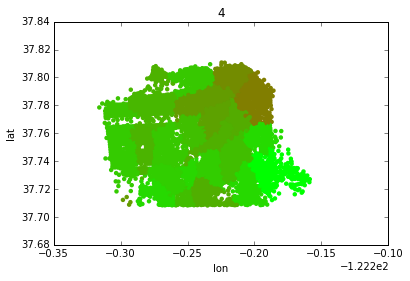

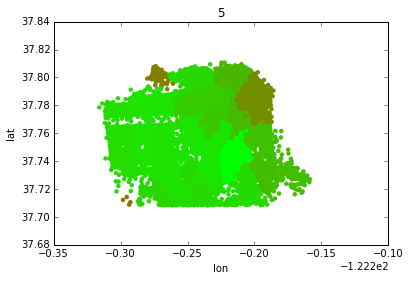

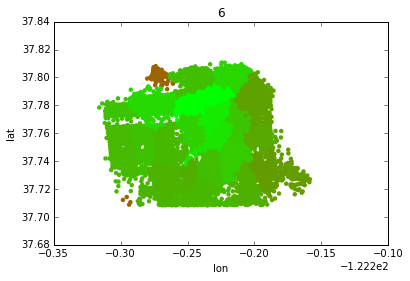

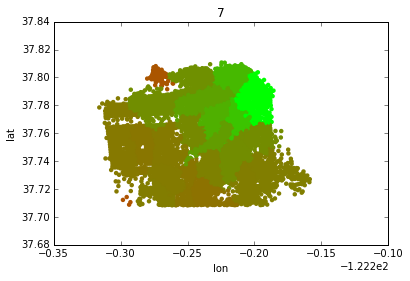

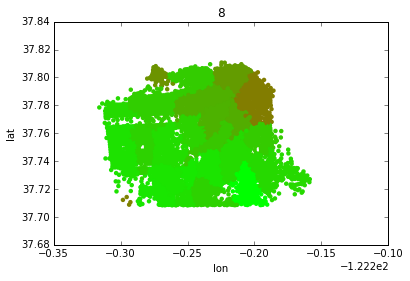

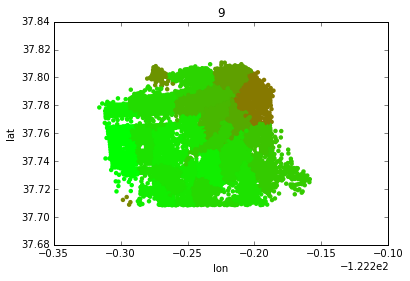

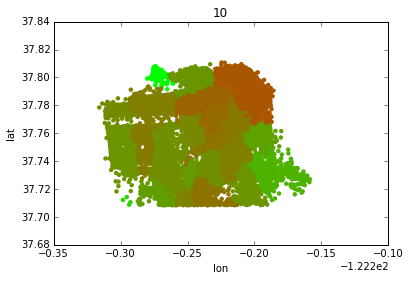

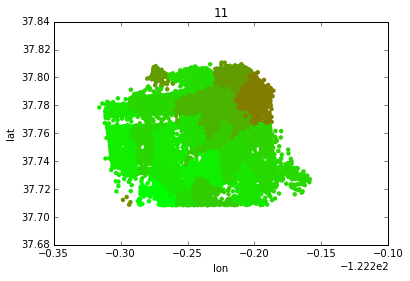

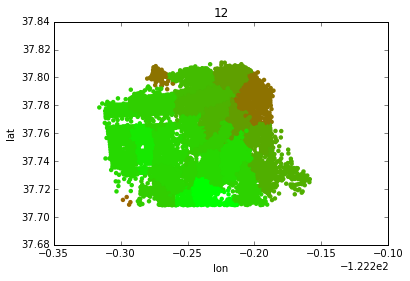

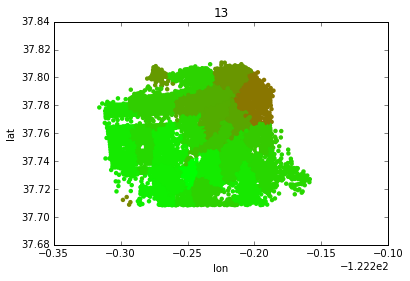

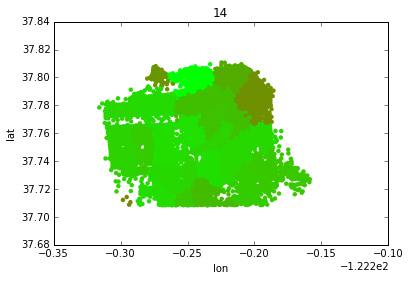

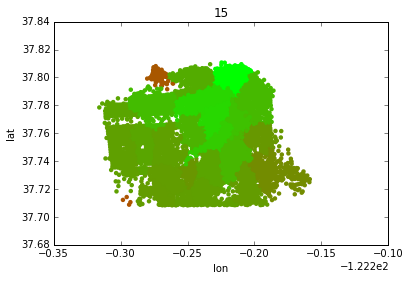

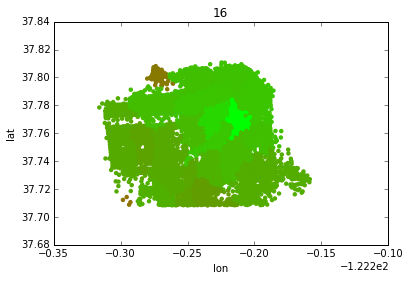

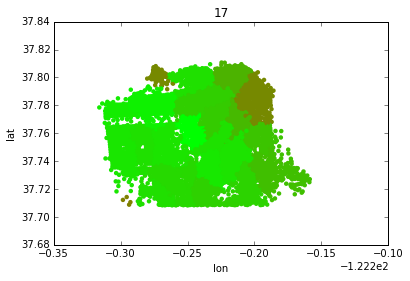

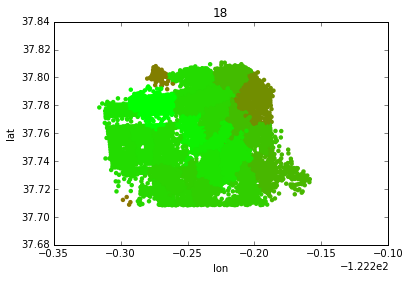

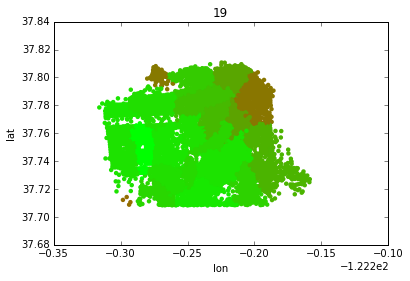

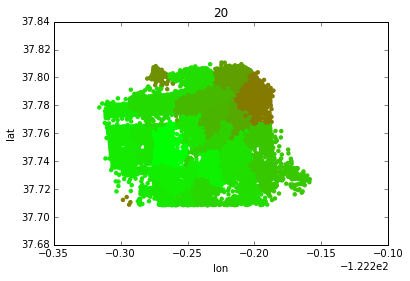

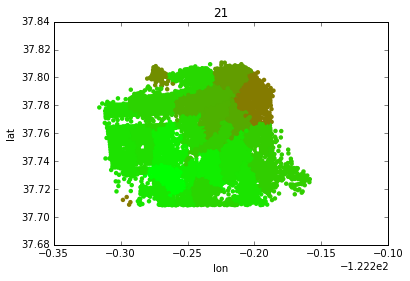

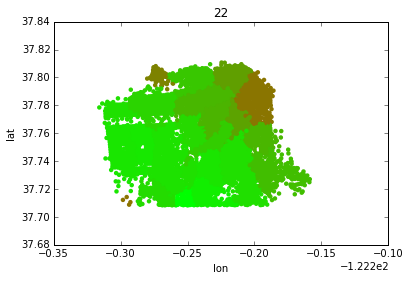

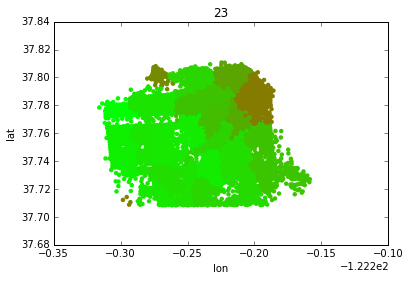

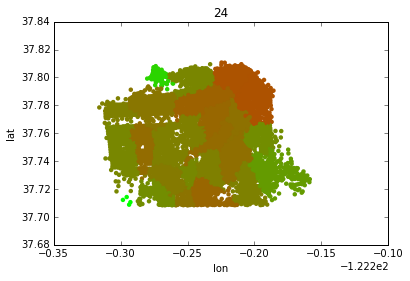

In [145]:
# fixed range, 0-10
for i in sim.index:
    pltc = cnum.replace(sim.loc[i]).apply(lambda x: matplotlib.colors.rgb2hex([x/10., 1-x/10., 0, 1]))
    plt.figure()
    fdf.plot(kind='scatter', x='lon', y='lat', c=pltc, linewidths=0)
    plt.title(i)

In [147]:
# scale max to 10
sim2 = sim * 10 / sim.max().max()
sim2.max().max()

10.0

In [148]:
sim2.max().max()

10.0

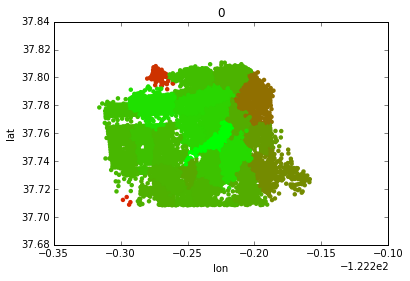

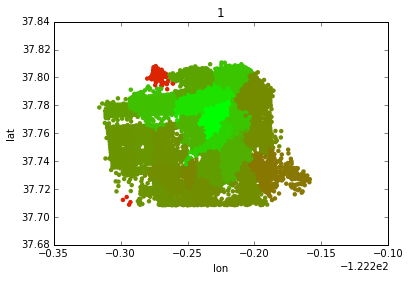

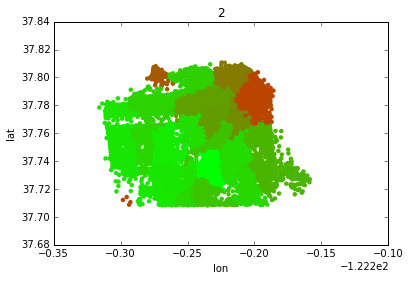

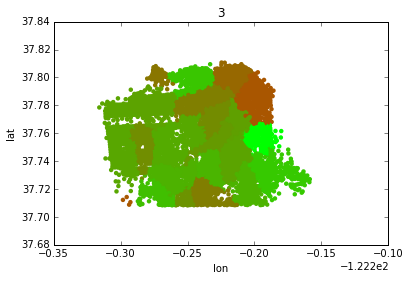

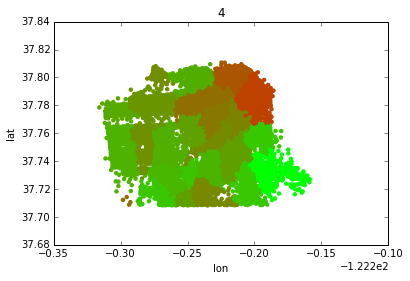

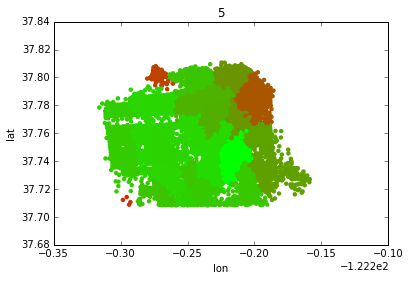

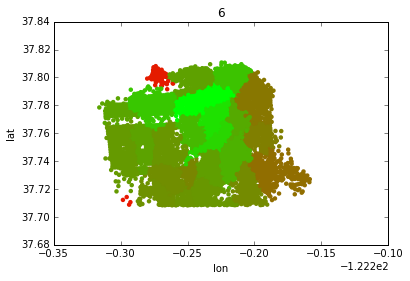

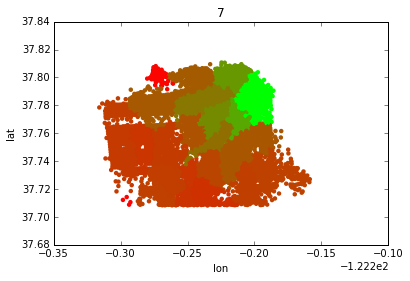

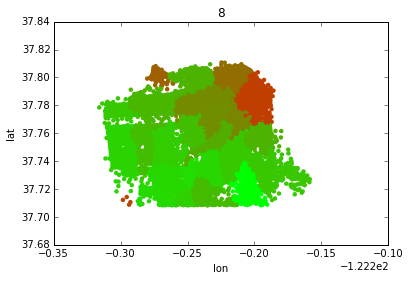

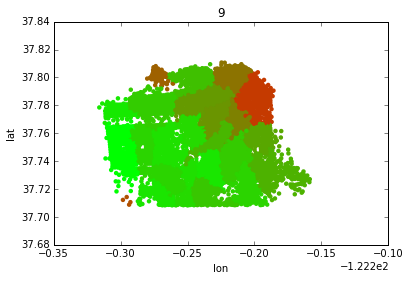

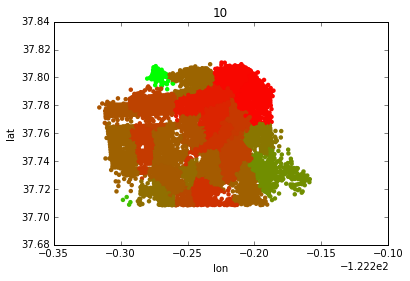

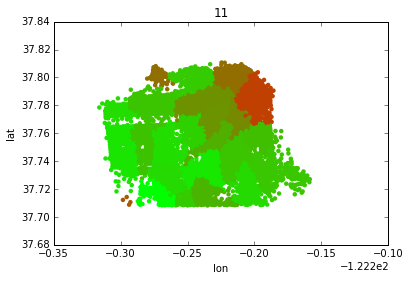

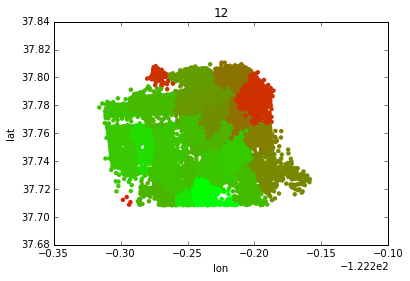

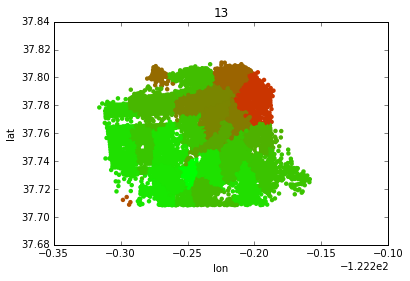

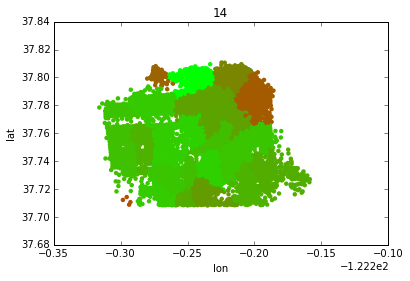

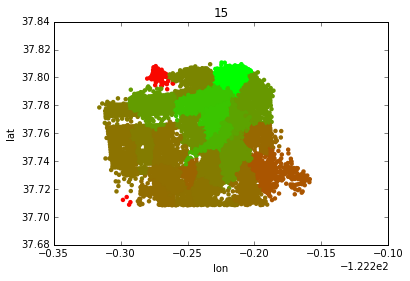

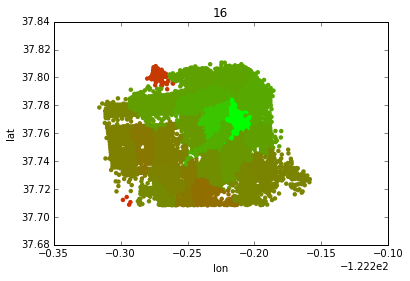

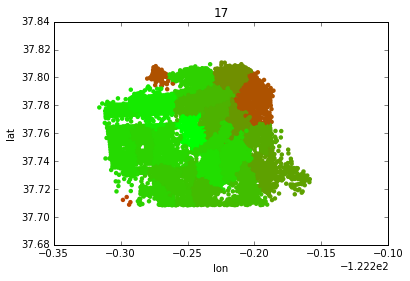

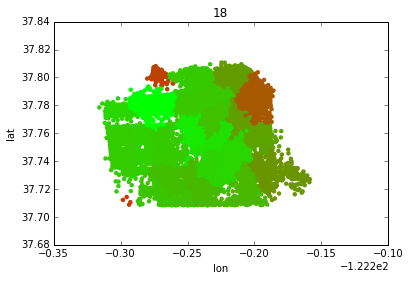

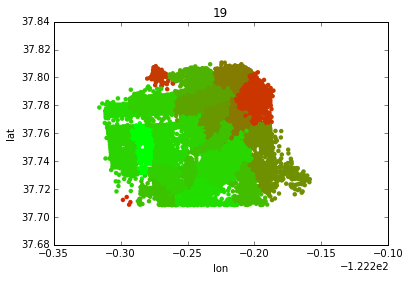

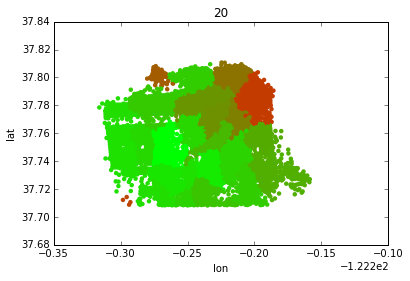

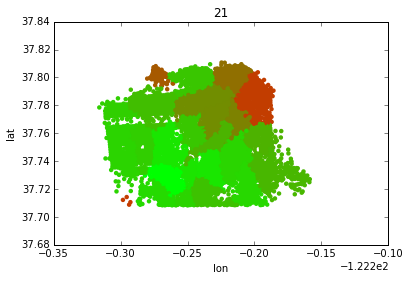

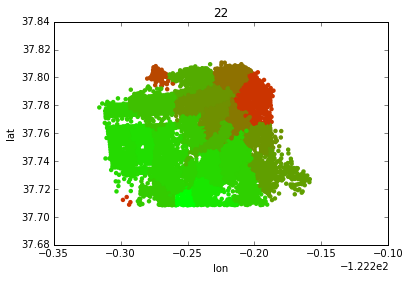

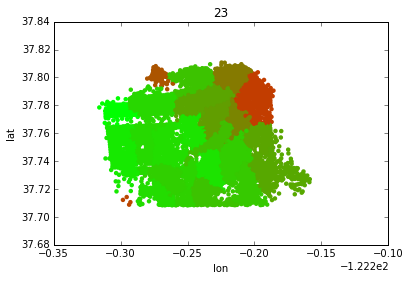

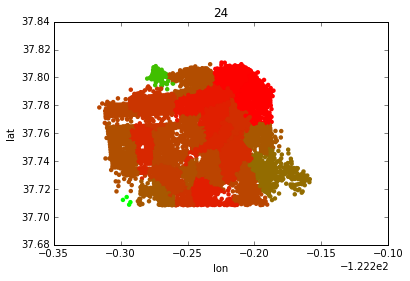

In [149]:
# variable range, 0-max(sim)
for i in sim2.index:
    pltc = cnum.replace(sim2.loc[i]).apply(lambda x: matplotlib.colors.rgb2hex([x/10., 1-x/10., 0, 1]))
    plt.figure()
    fdf.plot(kind='scatter', x='lon', y='lat', c=pltc, linewidths=0)
    plt.title(i)

# do it

In [114]:
def to_rghex(n):
    return matplotlib.colors.rgb2hex([n, 1-n, 0, 1])

def rg_colormatrix(sim):
    normed = sim / sim.max().max()
    return normed.applymap(to_rghex)

In [151]:
rghex = rg_colormatrix(sim)
rghex

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,#00ff00,#2ed100,#3dc200,#659a00,#748b00,#26d900,#29d600,#906f00,#53ac00,#48b700,...,#4cb300,#53ac00,#2cd300,#1fe000,#3ec100,#46b900,#4bb400,#4ab500,#40bf00,#da2500
1,#2ed100,#00ff00,#629d00,#738c00,#887700,#50af00,#1ee100,#748b00,#718e00,#6a9500,...,#3ac500,#3bc400,#4db200,#3fc000,#689700,#6e9100,#728d00,#6f9000,#619e00,#e01f00
2,#3dc200,#629d00,#00ff00,#4ab500,#4ab500,#24db00,#609f00,#ba4500,#28d700,#19e600,...,#847b00,#718e00,#21de00,#2cd300,#29d600,#14eb00,#19e600,#27d800,#1ce300,#bb4400
3,#659a00,#738c00,#4ab500,#00ff00,#36c900,#5ba400,#807f00,#a95600,#4cb300,#58a700,...,#976800,#5fa000,#56a900,#5ca300,#718e00,#54ab00,#4db200,#6c9300,#5aa500,#a85700
4,#748b00,#887700,#4ab500,#36c900,#00ff00,#5fa000,#916e00,#be4100,#38c700,#4db200,...,#aa5500,#7b8400,#5ea100,#699600,#6f9000,#50af00,#48b700,#609f00,#57a800,#936c00
5,#26d900,#50af00,#24db00,#5ba400,#5fa000,#00ff00,#4db200,#a85700,#37c800,#34cb00,...,#6a9500,#689700,#29d600,#29d600,#29d600,#2bd400,#2ad500,#2ed100,#32cd00,#d42b00
6,#29d600,#1ee100,#609f00,#807f00,#916e00,#4db200,#00ff00,#887700,#748b00,#659a00,...,#3cc300,#55aa00,#46b900,#38c700,#5ca300,#699600,#718e00,#6a9500,#5aa500,#e81700
7,#906f00,#748b00,#ba4500,#a95600,#be4100,#a85700,#887700,#00ff00,#c03f00,#c53a00,...,#679800,#57a800,#ad5200,#a65900,#ca3500,#c43b00,#c23d00,#cb3400,#c23d00,#ff0000
8,#53ac00,#718e00,#28d700,#4cb300,#38c700,#37c800,#748b00,#c03f00,#00ff00,#2bd400,...,#926d00,#798600,#41be00,#49b600,#42bd00,#32cd00,#27d800,#2fd000,#36c900,#ba4500
9,#48b700,#6a9500,#19e600,#58a700,#4db200,#34cb00,#659a00,#c53a00,#2bd400,#00ff00,...,#8c7300,#7e8100,#25da00,#33cc00,#2bd400,#1ee100,#2bd400,#25da00,#16e900,#b04f00


In [154]:
rghex.iloc[1]

AttributeError: 'unicode' object has no attribute 'values'

# make json

In [216]:
map(lambda x: list(rgmatrix.ix[x]), cnum.unique())

[[u'#00ff00',
  u'#2ed100',
  u'#3dc200',
  u'#659a00',
  u'#748b00',
  u'#26d900',
  u'#29d600',
  u'#906f00',
  u'#53ac00',
  u'#48b700',
  u'#cd3200',
  u'#4fb000',
  u'#4cb300',
  u'#57a800',
  u'#41be00',
  u'#4cb300',
  u'#53ac00',
  u'#2cd300',
  u'#1fe000',
  u'#3ec100',
  u'#46b900',
  u'#4bb400',
  u'#4ab500',
  u'#40bf00',
  u'#da2500'],
 [u'#2ed100',
  u'#00ff00',
  u'#629d00',
  u'#738c00',
  u'#887700',
  u'#50af00',
  u'#1ee100',
  u'#748b00',
  u'#718e00',
  u'#6a9500',
  u'#db2400',
  u'#6c9300',
  u'#718e00',
  u'#7a8500',
  u'#5ba400',
  u'#3ac500',
  u'#3bc400',
  u'#4db200',
  u'#3fc000',
  u'#689700',
  u'#6e9100',
  u'#728d00',
  u'#6f9000',
  u'#619e00',
  u'#e01f00'],
 [u'#3dc200',
  u'#629d00',
  u'#00ff00',
  u'#4ab500',
  u'#4ab500',
  u'#24db00',
  u'#609f00',
  u'#ba4500',
  u'#28d700',
  u'#19e600',
  u'#a45b00',
  u'#18e700',
  u'#3ac500',
  u'#1ee100',
  u'#2fd000',
  u'#847b00',
  u'#718e00',
  u'#21de00',
  u'#2cd300',
  u'#29d600',
  u'#14eb00',
  u'

In [219]:
alldf = merge_map_data('results', fdf)

010405


In [220]:
alldf.head()

,cnum,polygon,color,rgmatrix,mapno,fbars
0,0,"POLYGON ((-122.451088 37.749696, -122.451063 3...",#e41a1c,"[#00ff00, #4ab500, #1de200, #34cb00, #2fd000, ...",,"[0.06, -0.11, -0.14, -0.09, -0.12, 0.1, 0.04, ..."
1,1,"(POLYGON ((-122.436138 37.749562, -122.43832 3...",#ae394d,"[#4ab500, #00ff00, #41be00, #4bb400, #50af00, ...",,"[0.07, 0.19, 0.18, 0.15, 0.24, 0.04, -0.0, 0.2..."
2,2,"(POLYGON ((-122.426737 37.711225, -122.426957 ...",#725c83,"[#1de200, #41be00, #00ff00, #39c600, #32cd00, ...",,"[-0.03, -0.06, -0.07, -0.06, -0.08, 0.22, 0.22..."
3,3,"POLYGON ((-122.391242391155 37.7517183826653, ...",#377eb8,"[#34cb00, #4bb400, #39c600, #00ff00, #1ae500, ...",,"[-0.04, -0.03, -0.08, -0.04, -0.04, -0.17, -0...."
4,4,"(POLYGON ((-122.376974 37.733616, -122.377041 ...",#3e8e95,"[#2fd000, #50af00, #32cd00, #1ae500, #00ff00, ...",,"[-0.17, -0.03, -0.08, -0.05, 0.02, -0.17, -0.0..."


In [229]:
gjson = make_json(alldf.cnum, alldf.polygon, alldf.color, alldf.rgmatrix, alldf.mapno, alldf.fbars)

with open('results/test.json', 'wb') as f:
    f.write(json.dumps(gjson))

In [233]:
fn = 'data/uscensus/tl_2010_06075_tabblock10/tl_2010_06075_tabblock10.dbf'

merge_shapefiles(fdf[['lat', 'lon']], fn).shape

(7299, 3)

# Additional color scaling

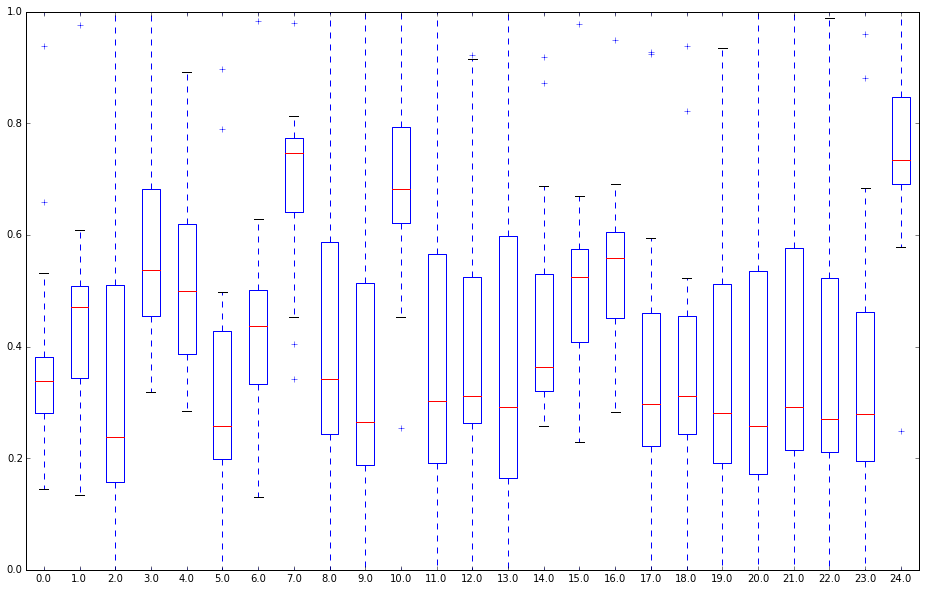

In [185]:
df = sim.copy()
df = df / df.max()
df.plot(kind='box', figsize=(16,10))

In [187]:
matplotlib.colors.rgb2hex([1.1, -1, 0, 1])

u'#118-ff00'

In [54]:
def rg_colormatrix(sim):
    normed = sim / sim.max().max()
    return normed.applymap(to_rghex)

In [55]:
rgmat = rg_colormatrix(sim)

In [56]:
fdf['cnum'] = cnum

In [57]:
rg = cnum.replace(rgmat.loc[0])
rg.unique()

array([u'#00ff00', u'#2ed100', u'#3dc200', u'#659a00', u'#748b00',
       u'#26d900', u'#29d600', u'#906f00', u'#53ac00', u'#48b700',
       u'#cd3200', u'#4fb000', u'#4cb300', u'#57a800', u'#41be00',
       u'#2cd300', u'#1fe000', u'#3ec100', u'#46b900', u'#4bb400',
       u'#4ab500', u'#40bf00', u'#da2500'], dtype=object)

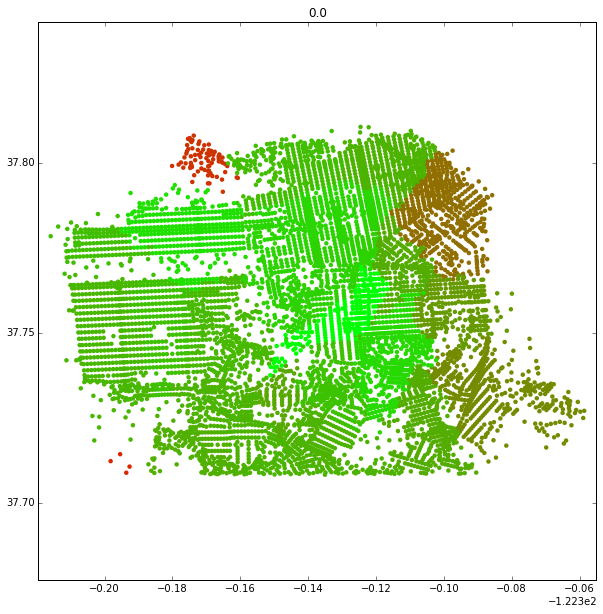

In [58]:

for i in rgmat.index[:1]:
    fdf['rg'] = cnum.replace(rgmat.loc[i])
    plt.figure(figsize=(10,10))
#     fdf.plot(kind='scatter', x='lon', y='lat', c=rg, linewidths=0, figsize=(10,10))
    plt.scatter(fdf.lon, fdf.lat, c=rg, linewidth=0)
    plt.title(i)
    plt.axis('equal')
    plt.margins(0)

In [239]:
def to_rghex(n):
    return matplotlib.colors.rgb2hex([n, 1 - n, 0, 1])

def rangerestrict(n):
    if n > 1:
        return 1
    elif n < 0:
        return 0
    else:
        return n

def rg_colormatrix(sim):
    df = sim.copy()
    q3 = df.apply(lambda x: np.percentile(x, 75))
    q1 = df.apply(lambda x: np.percentile(x, 25))
    iqr = q3 - q1
    df = df.sub(np.maximum((q1-1.5*iqr).values, df.min().values))
    q3 = df.apply(lambda x: np.percentile(x, 75))
    q1 = df.apply(lambda x: np.percentile(x, 25))
    iqr = q3 - q1
    df = df.div(np.minimum(q3+1.5*iqr, df.max().values))
    df = df.applymap(rangerestrict)
    return df.applymap(to_rghex)

rgmat = rg_colormatrix(sim)

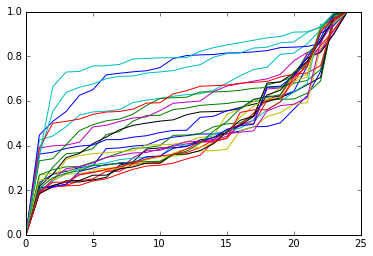

In [163]:
for i in sim.index:
    i = int(i)
    df = sim.copy()
    df = df / df.std()
#     df = np.log(df)
    df = df / df.max()
    df = df**.75
    df = df.sort_values(i)
    plt.plot(df.iloc[:,i])

In [161]:
sim.std()**2

0     1.665288
1     1.667260
2     1.968334
3     0.994034
4     1.200919
5     1.800797
6     1.848849
7     1.992954
8     1.710582
9     1.933540
10    2.052889
11    1.720419
12    2.298842
13    1.991283
14    1.142126
15    1.975157
16    1.157792
17    1.633370
18    1.669963
19    2.328035
20    2.034734
21    2.031454
22    2.228218
23    1.927465
24    2.073718
dtype: float64

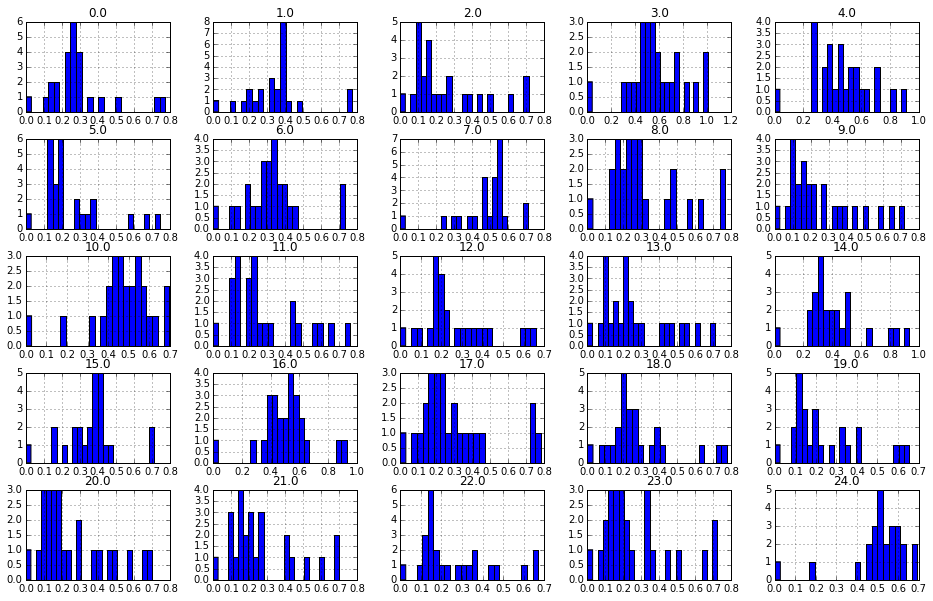

In [121]:
((sim / sim.max()) / sim.std()).hist(figsize=(16,10), bins=25);

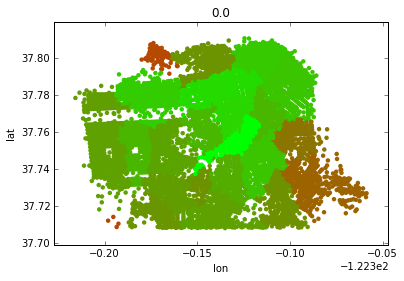

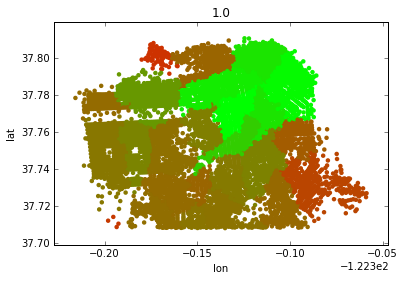

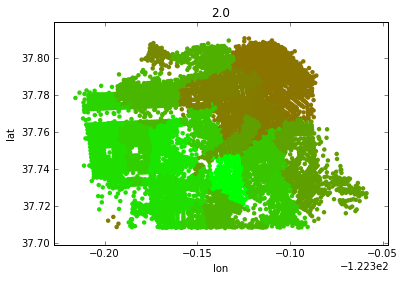

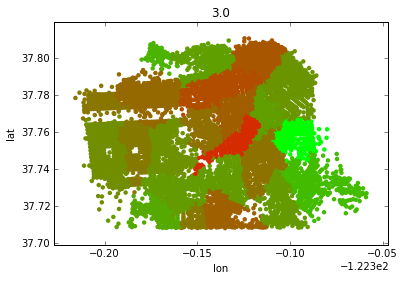

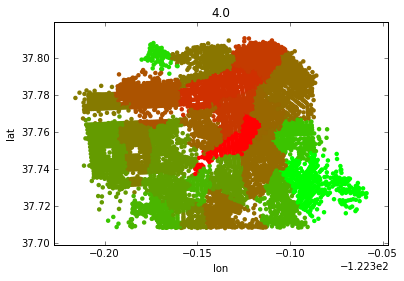

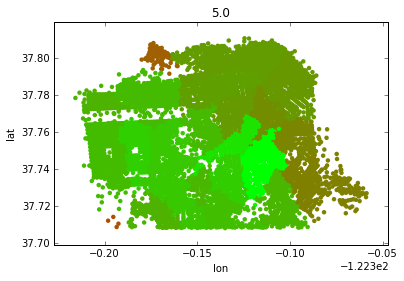

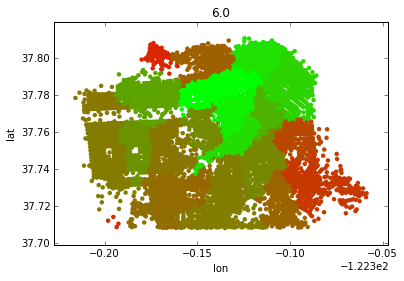

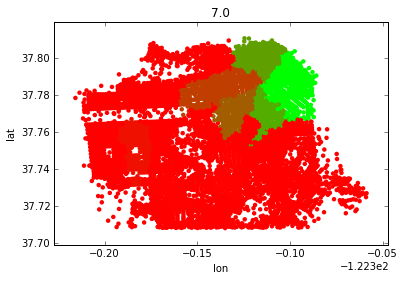

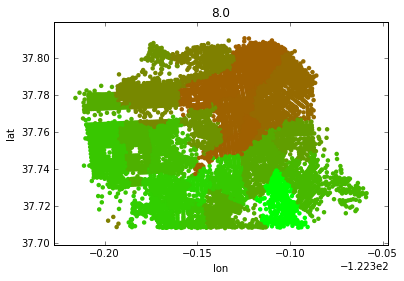

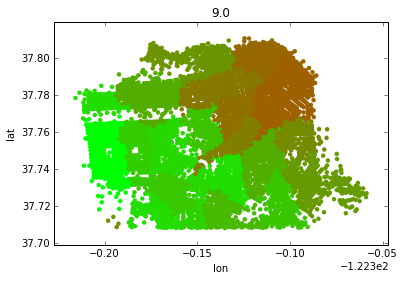

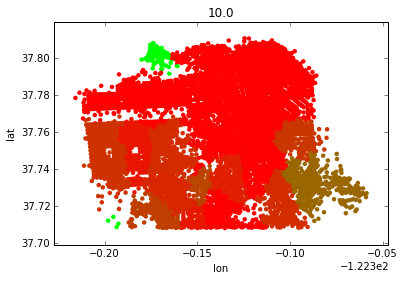

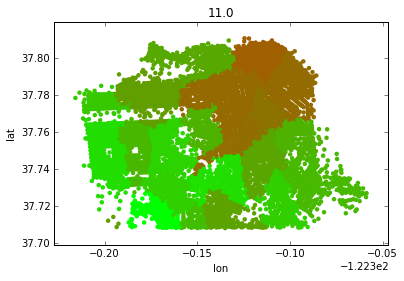

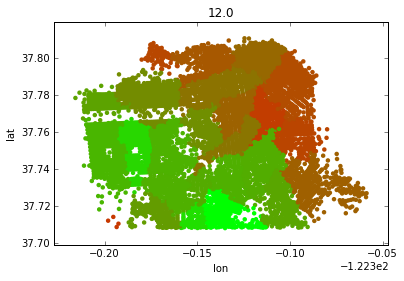

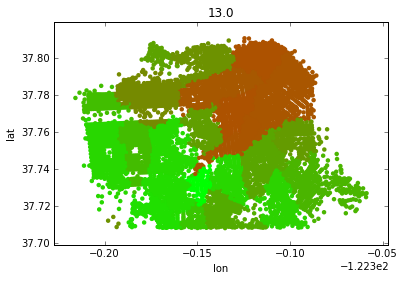

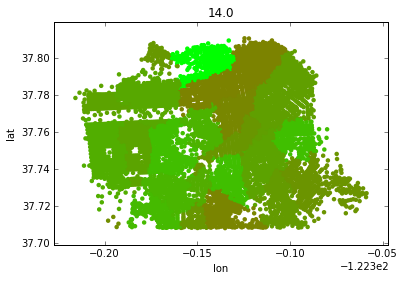

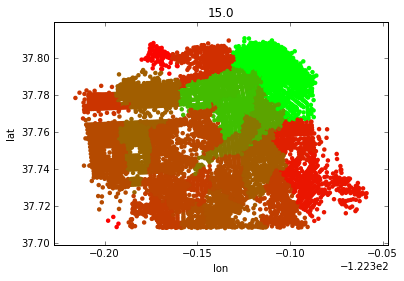

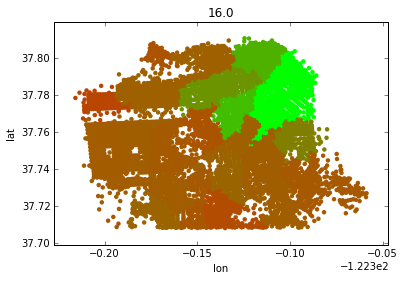

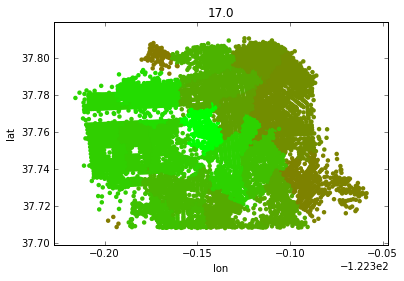

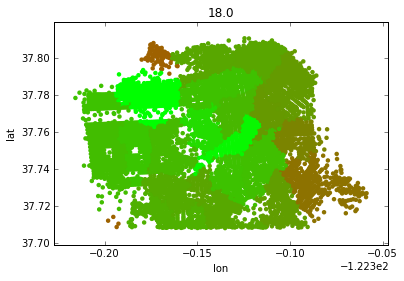

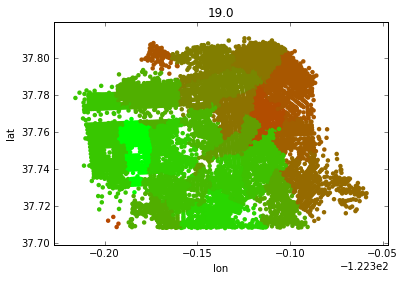

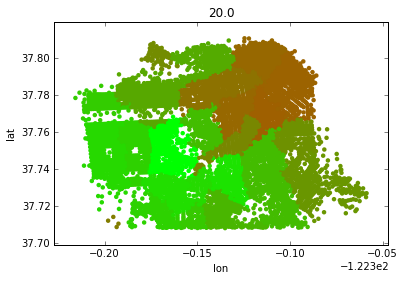

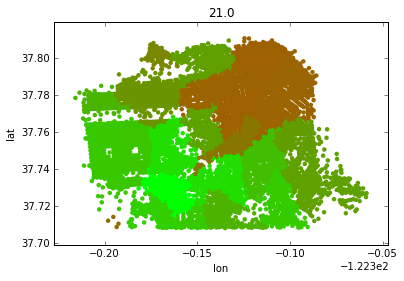

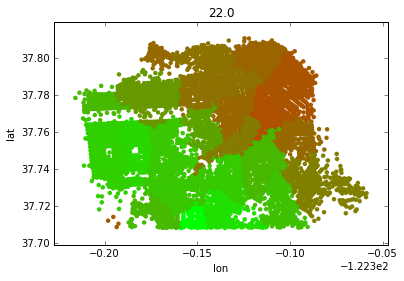

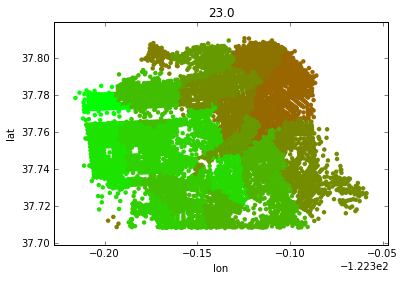

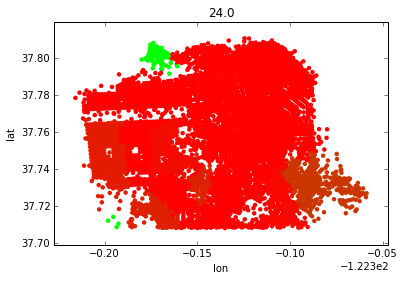

In [246]:

for i in rgmat.index:
    rg = cnum.replace(rgmat.loc[i])
    fdf.plot(kind='scatter', x='lon', y='lat', c=rg, linewidths=0)
    plt.title(i)
    plt.axis('equal')
    plt.margins(0)

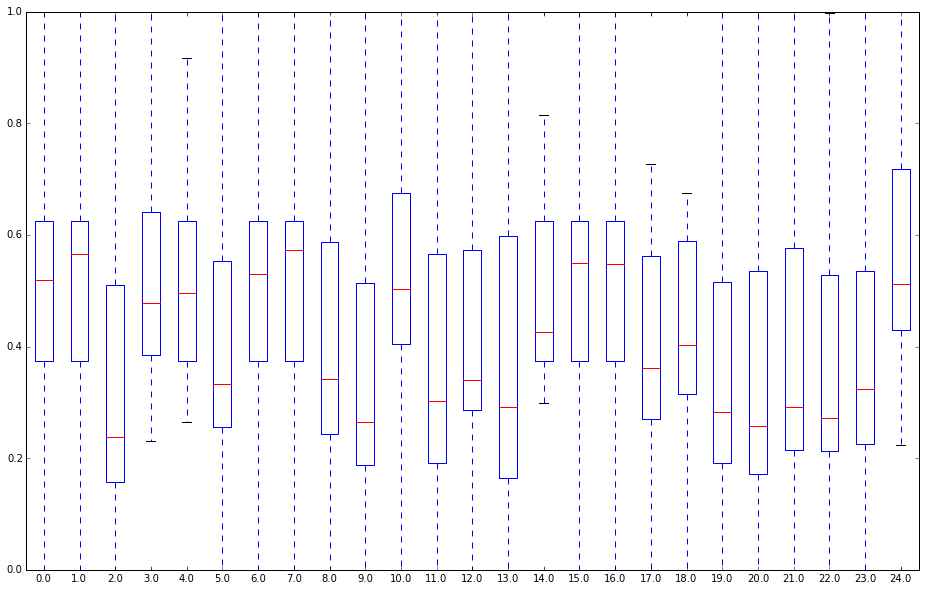

In [242]:
df = sim.copy()
q3 = df.apply(lambda x: np.percentile(x, 75))
q1 = df.apply(lambda x: np.percentile(x, 25))
iqr = q3 - q1
df = df.sub(np.maximum((q1-1.5*iqr).values, df.min().values))
q3 = df.apply(lambda x: np.percentile(x, 75))
q1 = df.apply(lambda x: np.percentile(x, 25))
iqr = q3 - q1
df = df.div(np.minimum(q3+1.5*iqr, df.max().values))
df = df.applymap(rangerestrict)
df.plot(kind='box', figsize=(16,10))

In [214]:
q3 = df.apply(lambda x: np.percentile(x, 75))
q1 = df.apply(lambda x: np.percentile(x, 25))
iqr = q3 - q1
iqr

0     0.25
1     0.25
2     0.25
3     0.25
4     0.25
5     0.25
6     0.25
7     0.25
8     0.25
9     0.25
10    0.25
11    0.25
12    0.25
13    0.25
14    0.25
15    0.25
16    0.25
17    0.25
18    0.25
19    0.25
20    0.25
21    0.25
22    0.25
23    0.25
24    0.25
dtype: float64

In [222]:
df = sim.copy()
q3 = df.apply(lambda x: np.percentile(x, 75))
q1 = df.apply(lambda x: np.percentile(x, 25))
iqr = q3 - q1

In [230]:
np.maximum((q1-1.5*iqr).values, df.min().values)

array([ 0.75933282,  0.571748  ,  0.        ,  0.51700095,  0.19197845,
        0.        ,  0.48896121,  3.00621319,  0.        ,  0.        ,
        2.41340224,  0.        ,  0.        ,  0.        ,  0.03720028,
        1.06732053,  1.21284453,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  3.10127616])

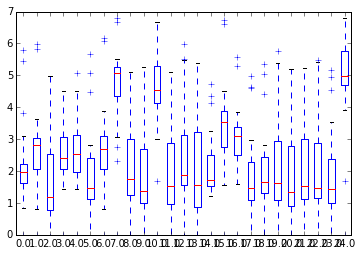

In [218]:
df.plot(kind='box')

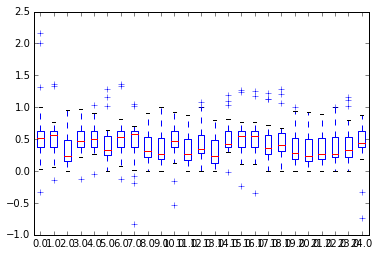

In [232]:
df.sub(np.maximum((q1-1.5*iqr).values, df.min().values)).plot(kind='box')

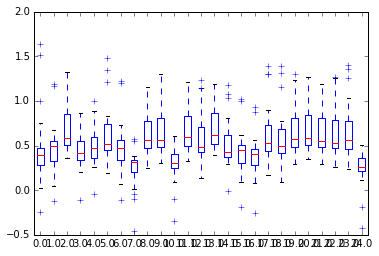

In [203]:
df.sub(q1-1.5*iqr).div(q3+1.5*iqr).plot(kind='box')

In [ ]:
df.sub(q1-1.5*iqr).div(q3+1.5*iqr).plot(kind='box')

# make test json

In [249]:
alldf = merge_map_data('results', fdf, store=False)
gjson = make_json(alldf.cnum, alldf.polygon,
                  alldf.rgmatrix, alldf.mapno, alldf.fbars)
with open('results/test.json', 'wb') as f:
    f.write(json.dumps(gjson))

020408
